# Análise de sentimentos em viagens aéreas
Você foi contratado pela DHAUZ como cientista de dados para participar em um
projeto para um site de venda de passagens aéreas que deseja desenvolver um
sistema de análise de sentimentos a partir dos reviews de passageiros. A ideia é
que, a partir da classificação das informações colocadas pelos passageiros, as
companhias aéreas possam entender quais os principais pontos a melhorar a
experiência do cliente.

##Essa variáveis fazem parte da base de dados

* Airline Name: Nome da companhia aérea.
* Overall_Rating: Classificação geral da experiência do passageiro com a companhia aérea.
* Review_Title: Título da avaliação escrita pelo passageiro.
* Review Date: Data em que a avaliação foi publicada.
* Review: Texto completo da avaliação escrita pelo passageiro.
* Aircraft: Tipo de aeronave utilizada no voo.
* Type Of Traveller: Tipo de viajante (e.g., negócios, lazer).
* Seat Type: Tipo de assento (e.g., econômica, executiva).
* Route: Rota do voo (origem e destino).
* Date Flown: Data em que o voo foi realizado.
* Seat Comfort: Conforto do assento, conforme avaliado pelo passageiro.
Cabin Staff Service: Serviço de equipe de cabine, conforme avaliado pelo passageiro.
* Food & Beverages: Qualidade da comida e das bebidas, conforme avaliado pelo passageiro.
* Ground Service: Serviço de atendimento em solo, conforme avaliado pelo passageiro.
* Inflight Entertainment: Entretenimento a bordo, conforme avaliado pelo passageiro.
* Wifi & Connectivity: Qualidade do wifi e conectividade a bordo, conforme avaliado pelo passageiro.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df = pd.read_csv('/content/Travel_Chalenge.csv', delimiter=';')
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
0,Air Seychelles,8,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CityJet,1,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shanghai Airlines,9,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN
3,Aerolineas Argentinas,8,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,NaN,0.0,NaN
4,Adria Airways,7,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            17702 non-null  object 
 1   Overall_Rating          17702 non-null  object 
 2   Review_Title            17702 non-null  object 
 3   Review Date             17702 non-null  object 
 4   Review                  17702 non-null  object 
 5   Aircraft                5665 non-null   object 
 6   Type Of Traveller       15953 non-null  object 
 7   Seat Type               17461 non-null  object 
 8   Route                   15876 non-null  object 
 9   Date Flown              15944 non-null  object 
 10  Seat Comfort            15456 non-null  float64
 11  Cabin Staff Service     15366 non-null  float64
 12  Food & Beverages        11924 non-null  float64
 13  Ground Service          15056 non-null  float64
 14  Inflight Entertainment  9231 non-null 

## Explorar os dados estatisticamente

In [5]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
count,15456.000000,15366.000000,11924.000000,15056.000000,9231.000000,5243.000000
mean,2.598344,2.850709,2.536313,2.330433,2.244611,1.800877
std,1.456198,1.595379,1.513762,1.591097,1.486511,1.327095
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Identificar valores ausentes

## 1º Faça uma etapa de processamento dos dados para verificar possíveis dados faltantes ou duplicados

In [6]:
pd.set_option("display.max_rows", None)

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
Wifi & Connectivity,12459,70.381878
Aircraft,12037,67.997966
Inflight Entertainment,8471,47.853350
Food & Beverages,5778,32.640380
Ground Service,2646,14.947464
Cabin Staff Service,2336,13.196249
Seat Comfort,2246,12.687832
Route,1826,10.315219
Date Flown,1758,9.931081
Type Of Traveller,1749,9.880240


In [ ]:
# porcentagem de valores missings para cada coluna
missing_pct = df.isna().mean()
# Retorna uma lista com as colunas com mais de 70% de valores missings
missing_cols = missing_pct[missing_pct > 0.70].index.tolist()

print(missing_cols)

['Wifi & Connectivity']


In [ ]:
def clean_and_impute(df):
    # Calcular a porcentagem de dados faltantes em cada coluna
    missing_percentage = df.isnull().mean() * 100

    # Excluir colunas com mais de 70% de dados faltantes
    columns_to_drop = missing_percentage[missing_percentage > 70].index
    df = df.drop(columns=columns_to_drop)

    # Imputar a mediana nas colunas numéricas restantes
    for col in df.columns:
        if df[col].isnull().sum() > 0 and pd.api.types.is_numeric_dtype(df[col]):
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)

    return df

In [ ]:
df_cleaned = clean_and_impute(df)

Para o classificador não entender que a ausência de dados é um padrão interessante, foi removido as features que apresentarem mais que 70% de dados ausentes. Para as features numéricas que apresentarem menos que 70% de dados ausentes, foi imputada a mediana, a fim de evitar problemas provenientes das distorções nas distribuições.

In [ ]:
df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment
0,Air Seychelles,8,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,2.0,1.0,2.0
1,CityJet,1,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,2.0,1.0,2.0
2,Shanghai Airlines,9,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,1.0,2.0
3,Aerolineas Argentinas,8,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,1.0,0.0
4,Adria Airways,7,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,1.0,0.0


In [9]:
# Total de linhas duplicadas
total_duplicates = df.duplicated(keep=False).sum()

# Porcentagem de duplicatas em relação ao número total de linhas
percent_duplicates = (total_duplicates / df.shape[0]) * 100

print(f"Total de linhas duplicadas: {total_duplicates}")
print(f"Porcentagem de duplicatas: {percent_duplicates:.2f}%")

Total de linhas duplicadas: 58
Porcentagem de duplicatas: 0.33%


In [10]:
# Remover duplicatas (considerando todas as colunas)
df = df.drop_duplicates()


print(f"Número de linhas após a remoção de duplicatas: {df.shape[0]}")

Número de linhas após a remoção de duplicatas: 17673


# Realizações das etapas padrões de NLP

## 2º Realize as etapas padrões de NLP nas colunas Review e Review_title (ex:Tokenização, remoção de stop-words, ...)

In [13]:
# Inicializar lematizador e stop-words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

## Importações e Downloads: Importa as bibliotecas necessárias (nltk para NLP e pandas para manipulação de dados) e baixa os recursos do NLTK.

## Definição da Função preprocess_review:

1 Conversão para minúsculas: Converte todo o texto para minúsculas para uniformizar.

2 Tokenização: Divide o texto em palavras (tokens).
3 Remoção de Pontuação: Remove tokens que não são palavras alfabéticas.

4 Remoção de Stop-Words: Filtra as palavras irrelevantes que não ajudam na análise de sentimento.

5 Lemmatização: Reduz as palavras à sua forma base para simplificação.

In [14]:
def expand_contractions(text):
    # Expandir contrações
    contractions = {
        "n't": "not", "'ll": "will", "'ve": "have", "'s": "is", "'re": "are",
        "'d": "would", "'m": "am", "'t": "not", "'p": "up", "'": " "
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text


def preprocess_text(text):
    # Expandir contrações
    text = expand_contractions(text)

    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover menções (@username) e hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remover emojis e caracteres especiais
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Converter para minúsculas
    text = text.lower()

    # Remover numerais
    text = re.sub(r'\d+', '', text)

    # Tokenização
    tokens = word_tokenize(text)

    # Remover pontuação
    tokens = [word for word in tokens if word.isalpha()]

    # Remover stop-words
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar tokens de volta em uma string
    return ' '.join(tokens)


In [15]:
# Aplicanado a função preprocess_text nas colunas Review_Title e Review
df['Processed_Review_Title'] = df['Review_Title'].apply(preprocess_text)
df['Processed_Review'] = df['Review'].apply(preprocess_text)

In [16]:
print(df[['Review_Title', 'Processed_Review_Title']].head(50))

                                         Review_Title  \
0                      Air Seychelles customer review   
1                             CityJet customer review   
2                   Shanghai Airlines customer review   
3               Aerolineas Argentinas customer review   
4                       Adria Airways customer review   
5                          QantasLink customer review   
6                "wouldn't recommend Cubana Airlines"   
7                            "budget airline quality"   
8                   "worst service in business class"   
9               "staff were helpful and professional"   
10                    "service is as great as before"   
11                           "worst customer service"   
12                             "We didn’t get refund"   
13                      "Good service, but poor food"   
14                     "a delay of more than 2 hours"   
15                          "I would avoid Edelweiss"   
16                            "

In [17]:
print(df[['Review', 'Processed_Review']].head(50))

                                               Review  \
0   LHR-SEZ-LHR. It's true that there aren't perso...   
1   London City to Antwerp was delayed 3 hours 40 ...   
2   PEK to HGH in Economy. Slight delay out of PEK...   
3   Rio to Buenos Aires AEP on 737. Departure dela...   
4   Outbound flight FRA/PRN A319. 2 hours 10 min f...   
5   On Friday 13th March I had a flight from Coffs...   
6     Flew from Varadero to Toronto April 8, 2016....   
7     Singapore to Kunming with SilkAir. Singapore...   
8     New York JFK to Duesseldorf. The worst servi...   
9     Flew Monarch Airlines from Las Palmas to Lon...   
10   Malta to Gatwick. The experience was pleasant...   
11    I travelled with Air Arabia from Dammam to A...   
12    Frankfurt to Bangkok via Beijing. We missed ...   
13    Tahiti to Los Angeles. Good service, but poo...   
14    Larnaca to Athens. Huge delays. On arrival a...   
15    Ho Chi Minh City to Zurich. We booked this f...   
16   Johannesburg to Cape Town.

# Explorar os dados visualmente

## 3º Exploração dos dados:
* a. Faça um gráfico para verificar a distribuição da feature Overall_rating
pelas companhias aéreas. Faça um gráfico similar para verificar a
distribuição dessa features pelos modelos de aeronaves (Aircraft)
* b. Utilize a visualização de nuvem de palavras para estudar quais
palavras mais aparecem quando o Overall_rating é igual ou inferior a
3 e quando é igual ou superior a 8.
* c. Estude a correlação e, portanto, o possível impacto das colunas que
contém notas separadas ('Seat Comfort', 'Cabin StaƯ Service', 'Food
& Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi &
Connectivity') na nota final (Overall_rating)

In [18]:
df['Overall_Rating'] = df['Overall_Rating'].replace('n', '10')

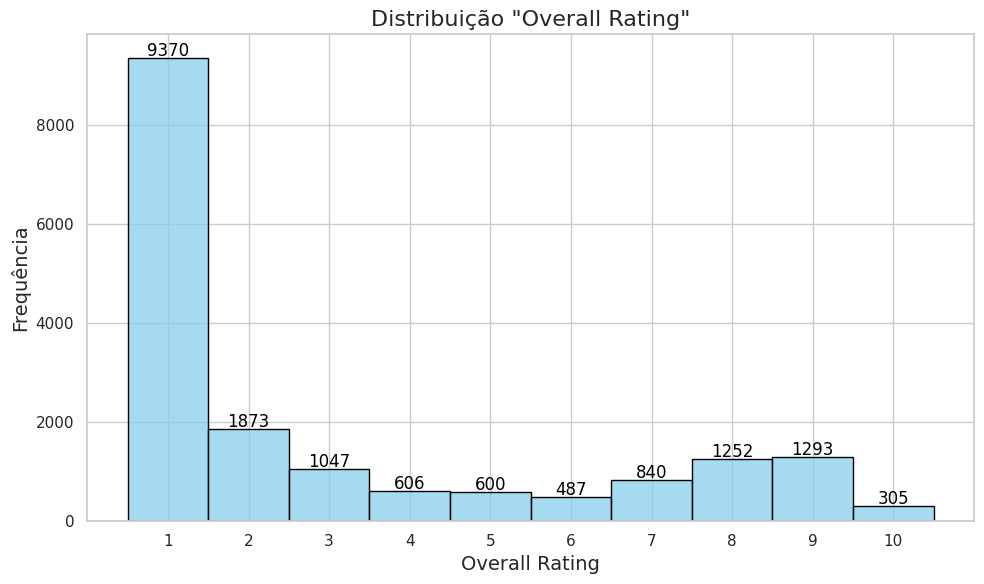

In [19]:
# Convertendo a coluna para o tipo numérico
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Definindo os intervalos dos bins (de 0 a 11 para incluir 10)
bins = list(range(1, 12))

# Criando o histograma
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['Overall_Rating'], bins=bins, discrete=True, color='skyblue', edgecolor='black')

# Adicionando números nas barras
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Adcionando números somente se a altura da barra for maior que 0
        hist_plot.annotate(f'{int(height)}',
                           (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 5),  # Deslocamento do texto
                           textcoords='offset points',
                           fontsize=12, color='black')

# Personalizando o gráfico
hist_plot.set_title('Distribuição "Overall Rating"', fontsize=16)
hist_plot.set_xlabel('Overall Rating', fontsize=14)
hist_plot.set_ylabel('Frequência', fontsize=14)
hist_plot.set_xticks(range(1, 11))  # Definindo os ticks do eixo X

# Exibindo o gráfico
plt.tight_layout()
plt.show()

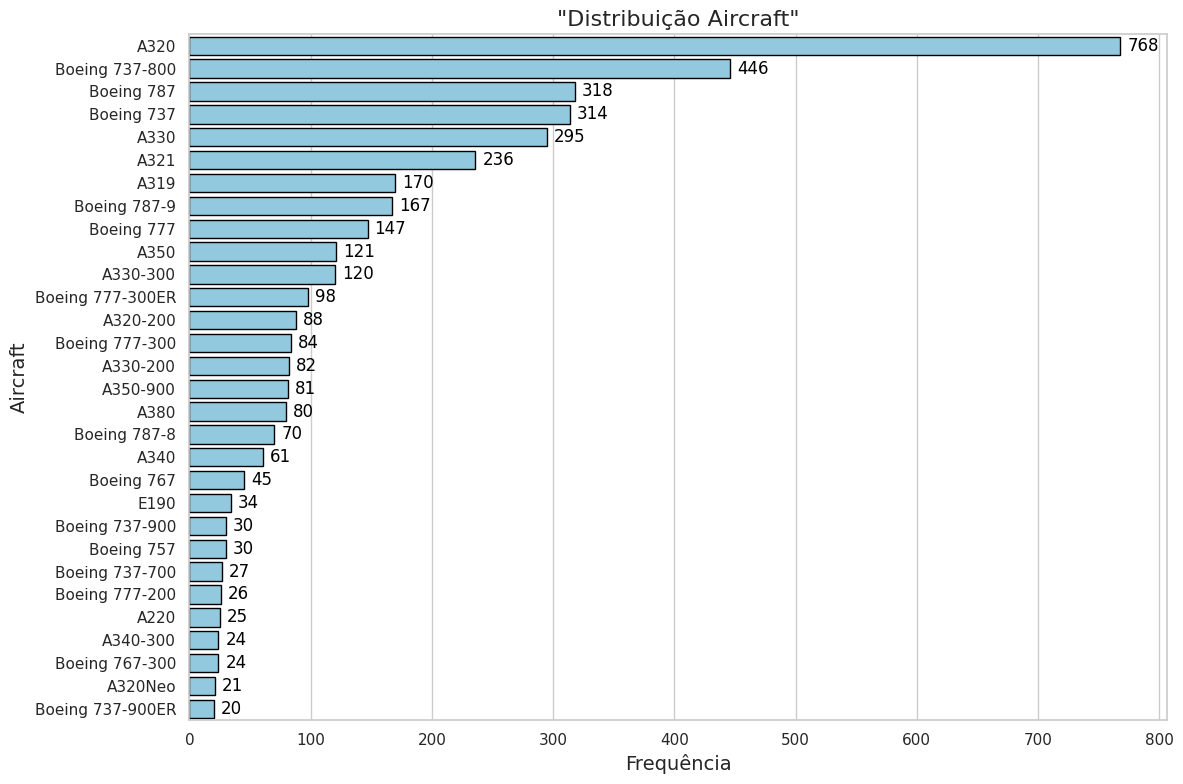

In [21]:
# Contar a frequência de cada aeronave
aircraft_counts = df['Aircraft'].value_counts()

# Filtrar para manter apenas as aeronaves com 20 ou mais ocorrências
aircraft_20 = aircraft_counts[aircraft_counts >= 20]
# Converter para DataFrame e renomear as colunas
aircraft_20 = aircraft_20.reset_index()
aircraft_20.columns = ['Aircraft', 'Count']



# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o histograma
plt.figure(figsize=(12, 8))
hist_plot = sns.barplot(x='Count', y='Aircraft', data=aircraft_20, color='skyblue', edgecolor='black')

# Adicionando números nas barras
for patch in hist_plot.patches:
    width = patch.get_width()
    hist_plot.annotate(f'{int(width)}',
                       (width, patch.get_y() + patch.get_height() / 2.),
                       ha='left', va='center',
                       xytext=(5, 0),  # Deslocamento do texto
                       textcoords='offset points',
                       fontsize=12, color='black')

# Personalizando o gráfico
hist_plot.set_title('"Distribuição Aircraft"', fontsize=16)
hist_plot.set_xlabel('Frequência', fontsize=14)
hist_plot.set_ylabel('Aircraft', fontsize=14)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

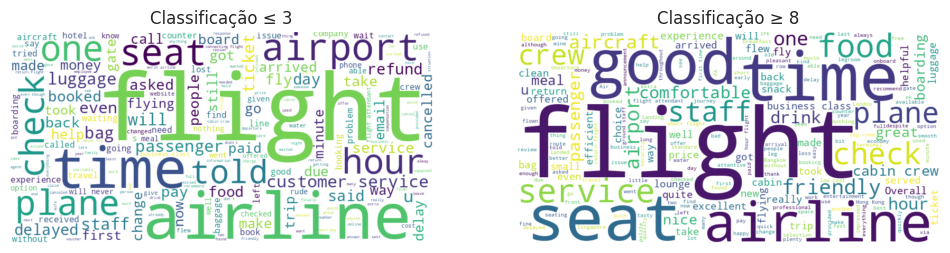

In [22]:
# Filtrar  Overall_Rating <= 3 e Overall_Rating >= 8
reviews_low = df[df['Overall_Rating'] <= 3]['Review']
reviews_high = df[df['Overall_Rating'] >= 8]['Review']

# Concatenando todas os Overall_Rating em uma única string
text_low = ' '.join(reviews_low)
text_high = ' '.join(reviews_high)

# Gerando nuvem de palavras para classificações baixas
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(text_low)

# Gerando nuvem de palavras para classificações altas
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(text_high)

# Visualizar as nuvens de palavras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.title('Classificação ≤ 3')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.title('Classificação ≥ 8')

plt.show()

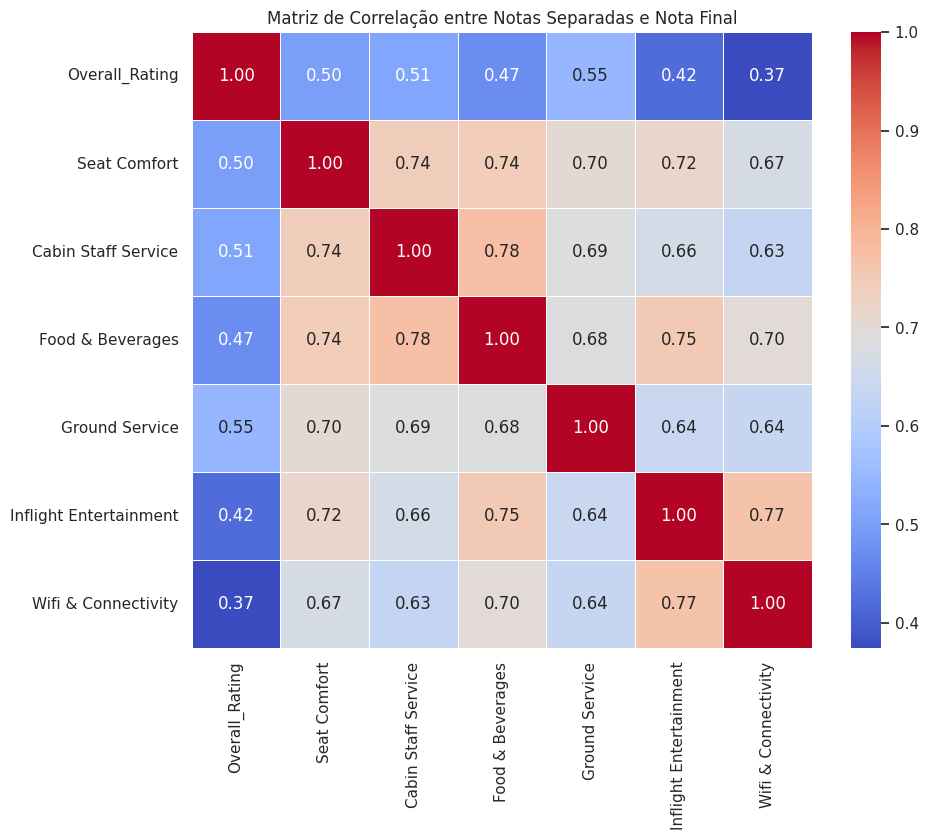

In [24]:
# Selecionando as colunas
columns_of_interest = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                        'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']
df_subset = df[columns_of_interest]

# Verificar se há valores nulos e preencher ou remover conforme necessário
df_subset = df_subset.dropna()

# Calculando a matriz de correlação
correlation_matrix = df_subset.corr()

# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Notas Separadas e Nota Final')
plt.show()


# Overall_Rating vs. Outras Colunas:

* Seat Comfort (0.496659): Há uma correlação positiva moderada entre Overall_Rating e Seat Comfort. Isso sugere que, em geral, quando a nota para Seat Comfort aumenta, a Overall_Rating tende a aumentar também, embora a relação não seja muito forte.
* Cabin Staff Service (0.518967): A correlação é um pouco mais alta, indicando uma relação positiva moderada. Quando a nota para Cabin Staff Service aumenta, a Overall_Rating tende a aumentar.
* Food & Beverages (0.471949): Também mostra uma correlação positiva moderada. Melhorias nas notas para Food & Beverages estão geralmente associadas a notas finais mais altas.
* Ground Service (0.543132): A correlação é um pouco mais forte, indicando que uma melhor avaliação para Ground Service tende a se associar a uma Overall_Rating mais alta.
* Inflight Entertainment (0.391427): A correlação é a mais baixa entre essas variáveis, sugerindo uma relação positiva, mas menos significativa em comparação com as outras colunas.

# Correlação entre Notas Separadas:

* Seat Comfort vs. Cabin Staff Service (0.737338): Há uma correlação positiva forte entre essas duas variáveis. Quando a nota para Seat Comfort aumenta, a nota para Cabin Staff Service também tende a aumentar.
* Seat Comfort vs. Food & Beverages (0.733819): Correlação positiva forte, indicando que melhorias em Seat Comfort estão associadas a melhores notas para Food & Beverages.
* Ground Service (0.680843) e Inflight Entertainment (0.617805): Mostram correlações positivas moderadas a fortes com outras variáveis, indicando que melhorias em uma dessas áreas tendem a estar associadas a melhores notas em outras áreas.

# Interpretação Geral:

Correlação Positiva: Em geral, as notas separadas tendem a estar positivamente correlacionadas entre si e com a Overall_Rating. Isso sugere que se um aspecto da experiência de voo melhora, é provável que outros aspectos também melhorem e, consequentemente, a nota geral do voo tende a ser mais alta.
Força da Correlação: As variáveis relacionadas à nota final (Overall_Rating) têm uma correlação positiva moderada a forte, indicando que mudanças nas notas das diferentes áreas provavelmente impactam a avaliação geral.

## 4º Utilizando o critério abaixo para classificar o sentimento de cada reviewcomo positivo, negativo e neutro, faça dois modelos de classificação desentimentos, sendo um deles utilizando os textos da review e review_titlecomo inputs e o outro utilizando as notas das features separadas ('Seat Comfort', 'Cabin StaƯ Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity') e compare os dois modelos.
* a. Nota final menor que 4: Negativo
* b. Nota final entre 4 e 7: Neutro
* c. Nota final maior que 7: Positivo

In [25]:
# Criando a coluna de sentimento
def classify_sentiment(rating):
    if rating < 4:
        return 'Negativo'
    elif rating <= 7:
        return 'Neutro'
    else:
        return 'Positivo'

df['Sentiment'] = df['Overall_Rating'].apply(classify_sentiment)

# Modelo com Textos
df['Text'] = df['Processed_Review'] + ' ' + df['Processed_Review_Title']
X_text = df['Text']
y_text = df['Sentiment']
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_text_vec = vectorizer.fit_transform(X_train_text)
X_test_text_vec = vectorizer.transform(X_test_text)

model_text = LogisticRegression()
model_text.fit(X_train_text_vec, y_train_text)

y_pred_text = model_text.predict(X_test_text_vec)
print('Modelo de Texto:')
print(classification_report(y_test_text, y_pred_text))

# Modelo com Notas de Features
features = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
             'Ground Service', 'Inflight Entertainment']

# Preencher valores faltantes
imputer = SimpleImputer(strategy='mean')
X_features_filled = imputer.fit_transform(df[features])

# Criando a coluna de sentimento
y = df['Sentiment']

# Dividindo os dados
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features_filled, y, test_size=0.2, random_state=42)

model_features = LogisticRegression()
model_features.fit(X_train_feat, y_train_feat)

y_pred_features = model_features.predict(X_test_feat)
print('Modelo de Features Separadas:')
print(classification_report(y_test_feat, y_pred_features))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo de Texto:
              precision    recall  f1-score   support

    Negativo       0.82      0.93      0.87      2464
      Neutro       0.50      0.21      0.30       521
    Positivo       0.54      0.49      0.51       550

    accuracy                           0.76      3535
   macro avg       0.62      0.55      0.56      3535
weighted avg       0.73      0.76      0.73      3535

Modelo de Features Separadas:
              precision    recall  f1-score   support

    Negativo       0.73      0.88      0.80      2464
      Neutro       0.00      0.00      0.00       521
    Positivo       0.43      0.44      0.43       550

    accuracy                           0.68      3535
   macro avg       0.39      0.44      0.41      3535
weighted avg       0.58      0.68      0.63      3535



## Modelo de texto
* Negativo: Obteve uma precisão de 82%, recall de 92% e um f1-score de 87%. Isso significa que o modelo foi muito bom em identificar avaliações negativas, com poucos falsos negativos.

* Neutro: Teve um desempenho mais fraco, com precisão de 49%, recall de 27%, e um f1-score de 35%. Isso indica dificuldade do modelo em classificar corretamente as avaliações neutras, possivelmente devido à sobreposição de características entre classes vizinhas.

* Positivo: O desempenho foi intermediário, com precisão de 57%, recall de 47%, e f1-score de 51%.

* Acurácia: 76%, mostrando que o modelo de texto consegue, em geral, fazer boas predições, especialmente nas classes extremas (Negativo e Positivo).

* Média ponderada: A weighted average para f1-score é de 73%, refletindo o impacto das classes desbalanceadas no resultado final.




## Modelo feature separadas
* Obteve uma precisão de 73%, recall de 87%, e um f1-score de 80%. Embora a precisão seja menor que no modelo de texto, o recall é alto, indicando que o modelo identifica a maioria das avaliações negativas, mas com mais falsos positivos.

* Neutro: Teve um desempenho muito baixo, com precisão de 50%, mas praticamente nenhum recall (0%). O f1-score foi de apenas 1%. Isso sugere que o modelo quase não conseguiu identificar avaliações neutras corretamente.

* Positivo: Desempenho mais baixo comparado ao modelo de texto, com precisão de 41%, recall de 42%, e f1-score de 42%.

* Acurácia: 68%, inferior ao modelo de texto. O modelo de features separadas tem mais dificuldade em prever corretamente o sentimento, especialmente na classe Neutro.

* Média ponderada: A weighted average para f1-score é de 62%, indicando que, apesar de conseguir capturar a classe negativa bem, o desempenho geral é prejudicado pelas dificuldades em classificar corretamente as outras classes.

## Conclusão
* Modelo de Texto: Tem um desempenho superior, especialmente na identificação das classes Negativo e Positivo. No entanto, encontra dificuldades em distinguir avaliações Neutras.

* Modelo de Features Separadas: Embora tenha um bom desempenho em identificar avaliações Negativas, falha em capturar corretamente as avaliações Neutras e tem dificuldades também na classe Positiva.


## 5º Com o modelo de classificação de sentimentos, faça uma análise sobre oimpacto de atrasos de viagem no NPS de 3 companhias aéreas.
* a. NPS = %positivos-%negativos

In [26]:
df['Airline Name'].value_counts()

,count
Airline Name,
LATAM Airlines,100
Egyptair,100
FlySafair,100
LOT Polish Airlines,100
Royal Jordanian Airlines,100
Avianca,100
Cathay Pacific Airways,100
Finnair,100
PLAY,100


In [27]:
# Criação da coluna 'delay_hours'
def extract_delay(review_title, review):
    # Combina texto do título e review para buscar menções de atrasos
    text = f"{review_title} {review}".lower()
    delay_pattern = r"(\d+)\s*(hours?|mins?|minutes?)\s*(delay|delayed)"
    match = re.search(delay_pattern, text)

    if match:
        delay_value = int(match.group(1))
        delay_unit = match.group(2)

        # Convertendo minutos para horas, se necessário
        if "min" in delay_unit:
            return delay_value / 60
        return delay_value
    return 0  # Sem menção de atraso


# Aplicando a função para criar a coluna 'delay_hours'
df['delay_hours'] = df.apply(lambda x: extract_delay(x['Review_Title'], x['Review']), axis=1)

# Convertendo a coluna 'Overall_Rating' para números inteiros
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

# Categorizando as reviews em positivas, neutras ou negativas
df['Sentiment'] = df['Overall_Rating'].apply(lambda x: 'Positivo' if x > 7 else ('Neutro' if 4 <= x <= 7 else 'Negativo'))

# Calculando o NPS por companhia aérea
# Filtrando as 3 companhias aéreas e calcular o NPS
selected_airlines = ['LATAM Airlines', 'Egyptair', 'FlySafair']
df = df[df['Airline Name'].isin(selected_airlines)]

nps_data = df.groupby('Airline Name').apply(lambda x: (x['Sentiment'].value_counts(normalize=True).get('Positivo', 0) - x['Sentiment'].value_counts(normalize=True).get('Negativo', 0)) * 100)

nps_with_delay = df[df['delay_hours'] > 0].groupby('Airline Name').apply(lambda x: (x['Sentiment'].value_counts(normalize=True).get('Positivo', 0) - x['Sentiment'].value_counts(normalize=True).get('Negativo', 0)) * 100)

nps_without_delay = df[df['delay_hours'] == 0].groupby('Airline Name').apply(lambda x: (x['Sentiment'].value_counts(normalize=True).get('Positivo', 0) - x['Sentiment'].value_counts(normalize=True).get('Negativo', 0)) * 100)

# Comparação de NPS com e sem atraso
nps_comparison = pd.DataFrame({
    'NPS Total': nps_data,
    'NPS com Atraso': nps_with_delay,
    'NPS sem Atraso': nps_without_delay
})

print(nps_comparison)


                NPS Total  NPS com Atraso  NPS sem Atraso
Airline Name                                             
Egyptair            -70.0           -50.0      -70.408163
FlySafair           -73.0          -100.0      -72.727273
LATAM Airlines      -74.0          -100.0      -73.469388


## NPS Total:

Um NPS negativo indica que há mais avaliações negativas do que positivas. No caso de todas as três companhias aéreas, o NPS total é significativamente negativo, o que sugere que a maioria dos clientes está insatisfeita com essas companhias.

#NPS com Atraso:

**Egyptair**, o NPS melhora para -50, indicando que, apesar dos atrasos, a insatisfação ainda é alta, mas um pouco menor em relação ao total. Por outro lado, para **FlySafair** e **LATAM Airlines**, o NPS com atraso cai para -100, o que significa que todas as avaliações com atrasos foram negativas. Isso mostra que atrasos afetam fortemente a satisfação dos clientes para essas companhias.

## NPS sem Atraso:

Para as três companhias, os valores de NPS são próximos ao NPS total, indicando que a experiência sem atrasos também não é muito positiva. No entanto, é importante observar que os valores são ligeiramente melhores que os NPS com atraso, especialmente no caso de **FlySafair** e **LATAM Airlines**, onde a diferença é mais acentuada.